In [2]:
#QUESTION 1
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN DATA FILE/
data = np.genfromtxt("munich_temperatures.txt")
Date = data[:,0]
Temp = data[:,1]

#time from 2008 to 2012
gd = (Date > 2008)  &\
     (Date < 2012)  &\
    (Temp<25)   &\
    (Temp>-5)
good = np.where(gd)[0]

#find best fit line
popt, pcov = opt.curve_fit(cosfit, Date[good], Temp[good], p0=[10,2*np.pi, np.pi, 10])

#best fit parameters:
print("*popt values: (a, b, c, d)",*popt)

# PLOT TO VERIFY FILE READ IN
fig1 = plt.figure(figsize=(20,15))
ax1 = fig1.add_subplot(111)
ax1.scatter(Date[good], Temp[good], s=5,c='g',alpha=0.9)
plt.plot(Date, cosfit(Date, *popt), c='r')

ax1.set_xlim(2008,2012)

ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

#overall average
over = (Temp<25)   &\
        (Temp>-5)
overall = np.where(over)[0]
print("average overall temperature:", np.mean(Temp[overall]))

#hottest time of the year
hotlist = []
for x in np.arange (2008, 2012, 0.0001):
    hotlist.append(cosfit(x, *popt))
print("average hottest temperature:", max(hotlist))

#coldest time of the year
coldlist = []
for x in np.arange (2008, 2012, 0.0001):
    coldlist.append(cosfit(x, *popt))
print("average coldest temperature:", min(hotlist))

print("pcov array:")
print(pcov)

*popt values: (a, b, c, d) 9.415784596491859 6.294984536173773 -20.807822173210006 9.530524946801926
average overall temperature: 9.608956010891246
average hottest temperature: 18.946309540854894
average coldest temperature: 0.11474036213818373
pcov array:
[[ 1.60126809e-02  1.33795854e-04 -2.68936002e-01 -2.27777922e-04]
 [ 1.33795854e-04  1.34791928e-04 -2.70935011e-01  2.01827788e-04]
 [-2.68936002e-01 -2.70935011e-01  5.44586045e+02 -4.05680544e-01]
 [-2.27777922e-04  2.01827788e-04 -4.05680544e-01  8.06908783e-03]]


ColDefs(
    name = 'APSTAR_ID'; format = '45A'
    name = 'TARGET_ID'; format = '34A'
    name = 'ASPCAP_ID'; format = '46A'
    name = 'FILE'; format = '38A'
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '8A'
    name = 'LOCATION_ID'; format = 'I'
    name = 'FIELD'; format = '16A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '140A'
    name = 'SURVEY'; format = '14A'
    name = 'NINST'; format = '3J'
    name = 'NVISITS'; format = 'J'
    name = 'COMBTYPE'; format = 'J'
    name = 'COMMISS'; format = 'I'
    name = 'SNR'; format = 'E'
    n

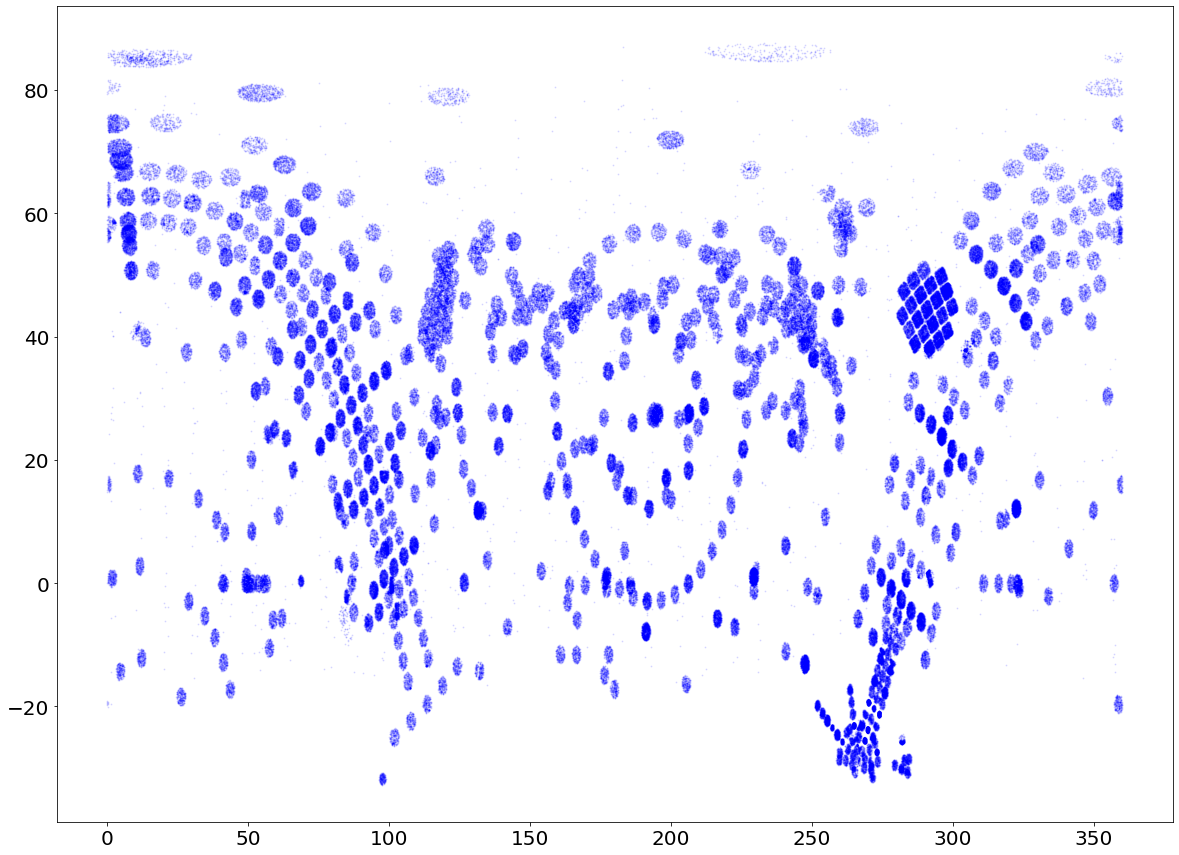

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolean Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['ra'][good],star['DEC'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log


[ 2.75696355e+00  6.44267232e-01 -1.63795180e+03 -1.76208923e+01]


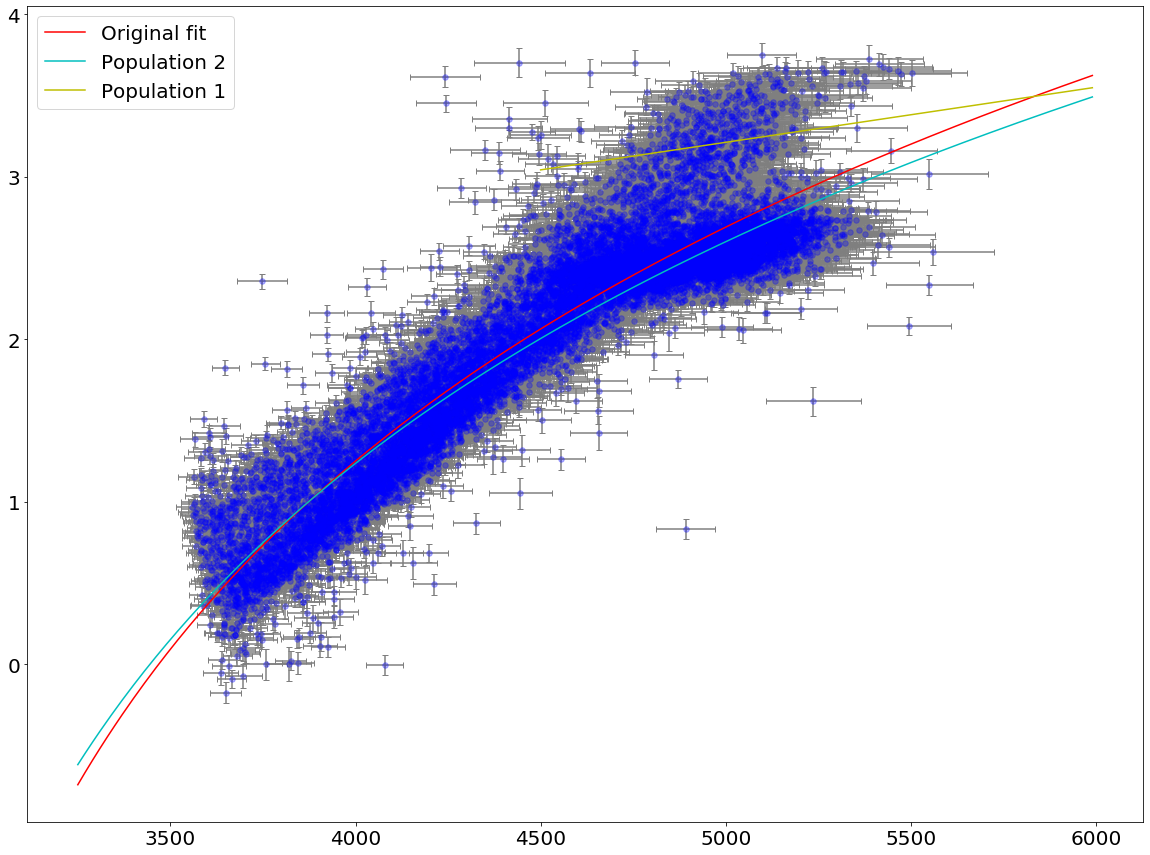

In [35]:
#a Fit TEFF, (TEFF_ERR) vs. LogG (LOGG_ERR)
#selecting only -1< GLAT < 1 stars with a mask:

a = (star['GLAT'] > -1) &\
    (star['GLAT'] < 1) &\
    (star['TEFF'] < 9999) &\
    (star['TEFF']>-9990) &\
    (star['LOGG']< 9999)&\
    (star['LOGG']>-9990)
amask = np.where(a)[0]

b = (star['GLAT'] > -1) &\
    (star['GLAT'] < 1) &\
    (star['TEFF'] < 9999) &\
    (star['TEFF']>-9990) &\
    (star['LOGG']<9999)&\
    (star['LOGG']>2.9) 
bmask = np.where(b)[0]

c = (star['GLAT'] > -1) &\
    (star['GLAT'] < 1) &\
    (star['TEFF'] < 9999) &\
    (star['TEFF']>-9990) &\
    (star['LOGG']< 2.5)&\
    (star['LOGG']>-9990)
cmask = np.where(c)[0]

#fitting
popt, pcov = opt.curve_fit(logfit, star['TEFF'][amask], star['LOGG'][amask])
print(popt)

#population 1
def mcFitLine(x, y, x_err, y_err):
    slopes = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightx = np.random.randn(len(x))
        weighty = np.random.randn(len(y))

        x_adj = x + x_err*weightx 
        y_adj = y + y_err*weighty

        params, cov = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
    
    return [np.mean(slopes), np.mean(y_ints)], [np.std(slopes), np.std(y_ints)]

popt1, pcov1 = mcFitLine(star['TEFF'][bmask], star['LOGG'][bmask], star['TEFF_ERR'][bmask], star['LOGG_ERR'][bmask])

#population 2 ---- FIX THIS ONE
popt2, pcov2 = opt.curve_fit(logfit, star['TEFF'][cmask], star['LOGG'][cmask])

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['TEFF'][amask],star['LOGG'][amask],s=30,c='b',alpha=0.3)
ax.errorbar(star['TEFF'][amask],star['LOGG'][amask], xerr=star['TEFF_ERR'][amask], c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)
ax.errorbar(star['TEFF'][amask],star['LOGG'][amask], yerr=star['LOGG_ERR'][amask], c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)

xdata = np.arange(3250,6000,10)
plt.plot(xdata, logfit(xdata, *popt), c='r', label='Original fit')
#plt.plot(xdata, linear(xdata, *popt1), c='y', label='Population 1')
plt.plot(xdata, logfit(xdata, *popt2), c='c', label='Population 2')

xdata = np.arange(4500,6000,10)
plt.plot(xdata, linear(xdata, *popt1), c='y', label='Population 1')

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

plt.legend(loc='best', fontsize=20)
plt.show()

<ErrorbarContainer object of 3 artists>

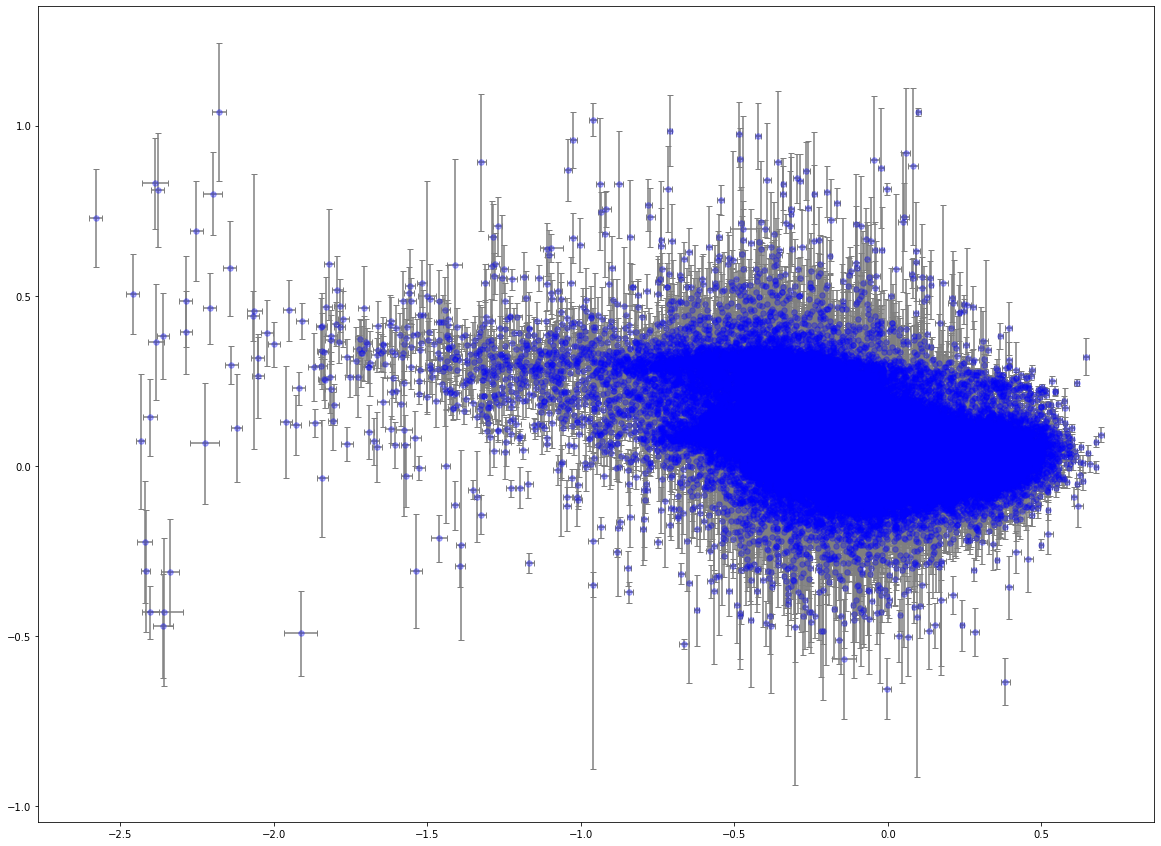

In [17]:
#b fit
qb = (star['GLAT'] > -10) &\
    (star['GLAT'] < 10) &\
    (star['Fe_H'] < 9999) &\
    (star['Fe_H']>-9990) &\
    (star['O_FE']< 9999)&\
    (star['O_FE']>-9990)
partbmask = np.where(qb)[0]

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['Fe_H'][partbmask],star['O_FE'][partbmask],s=30,c='b',alpha=0.3)
ax.errorbar(star['Fe_H'][partbmask],star['O_FE'][partbmask], xerr=star['Fe_H_ERR'][partbmask], c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)
ax.errorbar(star['Fe_H'][partbmask],star['O_FE'][partbmask], yerr=star['O_FE_ERR'][partbmask], c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)

<ErrorbarContainer object of 3 artists>

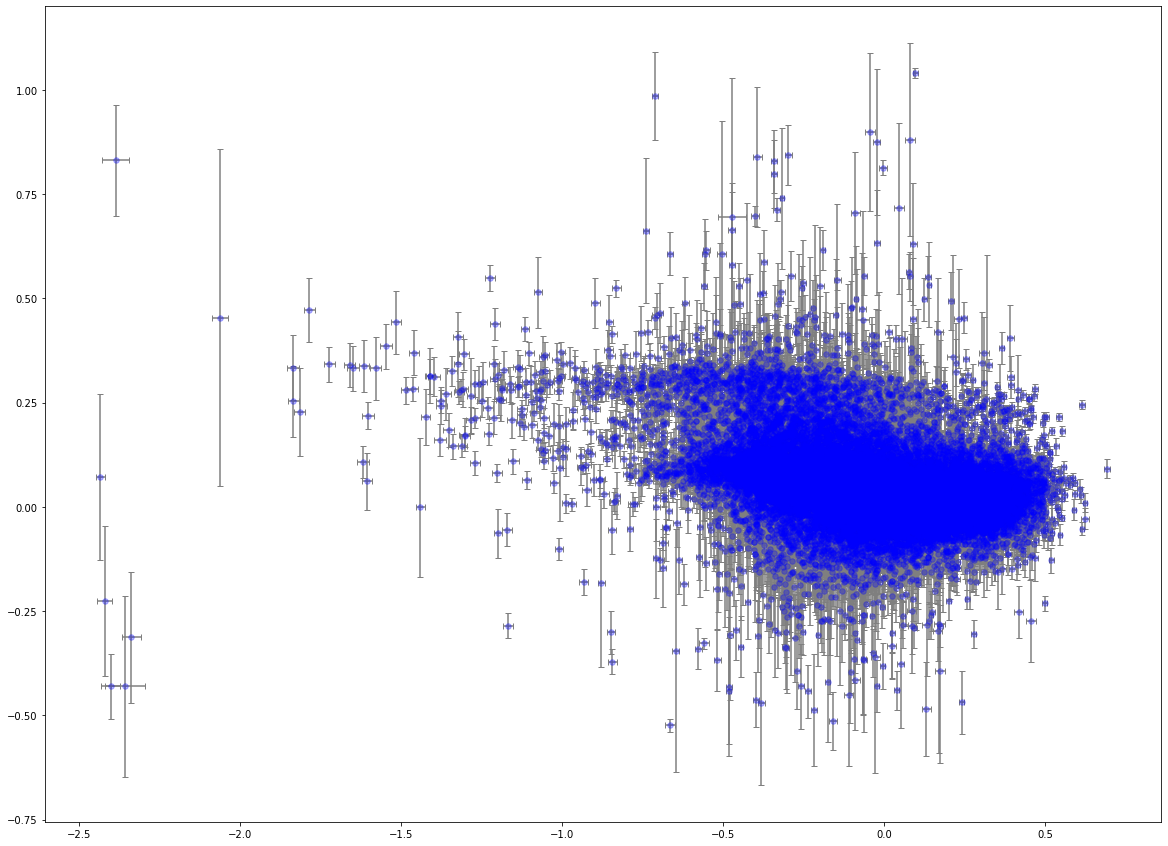

In [18]:
#c fit
qc = (star['GLAT'] > -2) &\
    (star['GLAT'] < 2) &\
    (star['Fe_H'] < 9999) &\
    (star['Fe_H']>-9990) &\
    (star['O_FE']< 9999)&\
    (star['O_FE']>-9990)
partcmask = np.where(qc)[0]

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['Fe_H'][partcmask],star['O_FE'][partcmask],s=30,c='b',alpha=0.3)
ax.errorbar(star['Fe_H'][partcmask],star['O_FE'][partcmask], xerr=star['Fe_H_ERR'][partcmask], c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)
ax.errorbar(star['Fe_H'][partcmask],star['O_FE'][partcmask], yerr=star['O_FE_ERR'][partcmask], c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)

<ErrorbarContainer object of 3 artists>

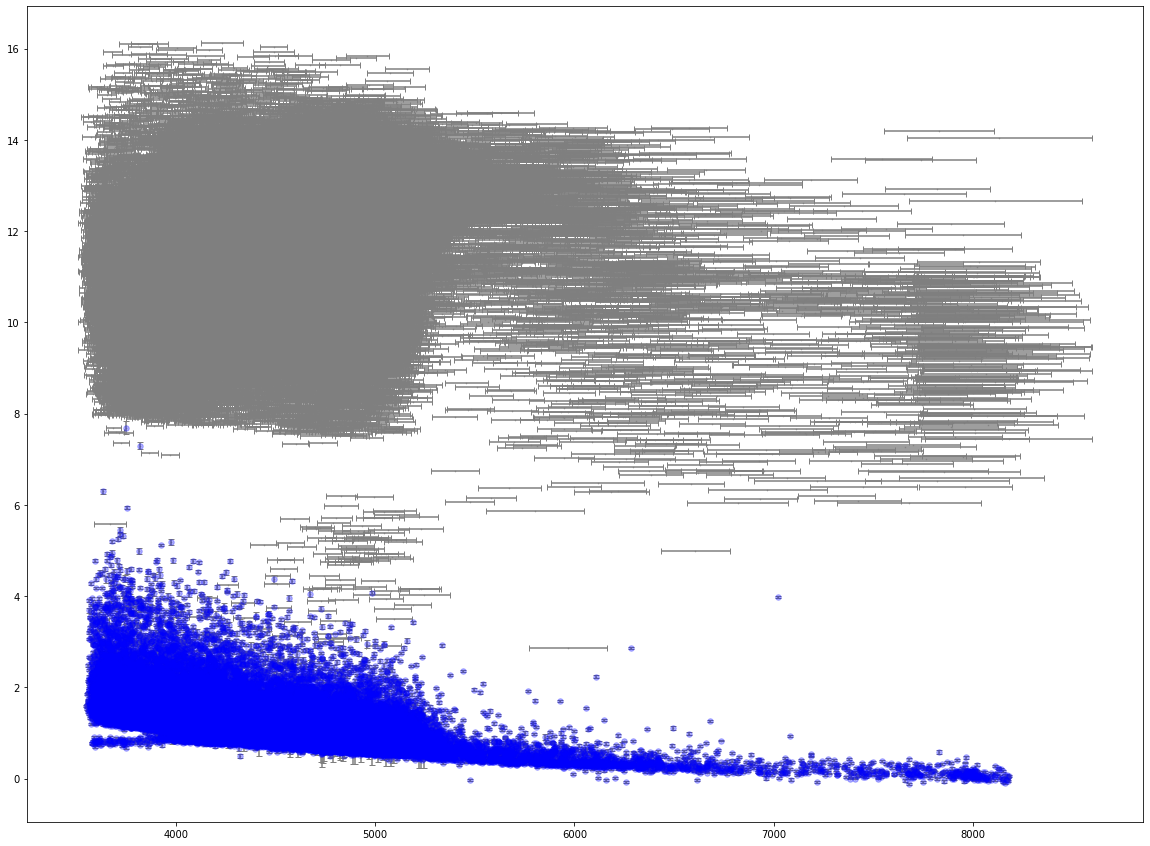

In [42]:
#d fit
qd = (star['GLAT'] > -10) &\
    (star['GLAT'] < 10) &\
    (star['TEFF'] < 9999) &\
    (star['TEFF']>-9990) &\
    (star['J']< 9999)&\
    (star['J']>-9990)&\
    (star['K']< 9999)&\
    (star['K']>-9990) &\
    (star['K_ERR']<9999)&\
    (star['K_ERR']>-9999)&\
    (star['J_ERR']<9999)&\
    (star['J_ERR']>-9999)
partdmask = np.where(qd)[0]

#jk_err = np.sqrt((star[])) <<<<< pic on phone

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['TEFF'][partdmask],(star['J'][partdmask]-star['K'][partdmask]),s=30,c='b',alpha=0.3)
ax.errorbar(star['TEFF'][partdmask],star['J'][partdmask], xerr=star['TEFF_ERR'][partdmask], c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)
ax.errorbar(star['TEFF'][partdmask],(star['J'][partdmask]-star['K'][partdmask]), yerr=jk_err, c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)

<ErrorbarContainer object of 3 artists>

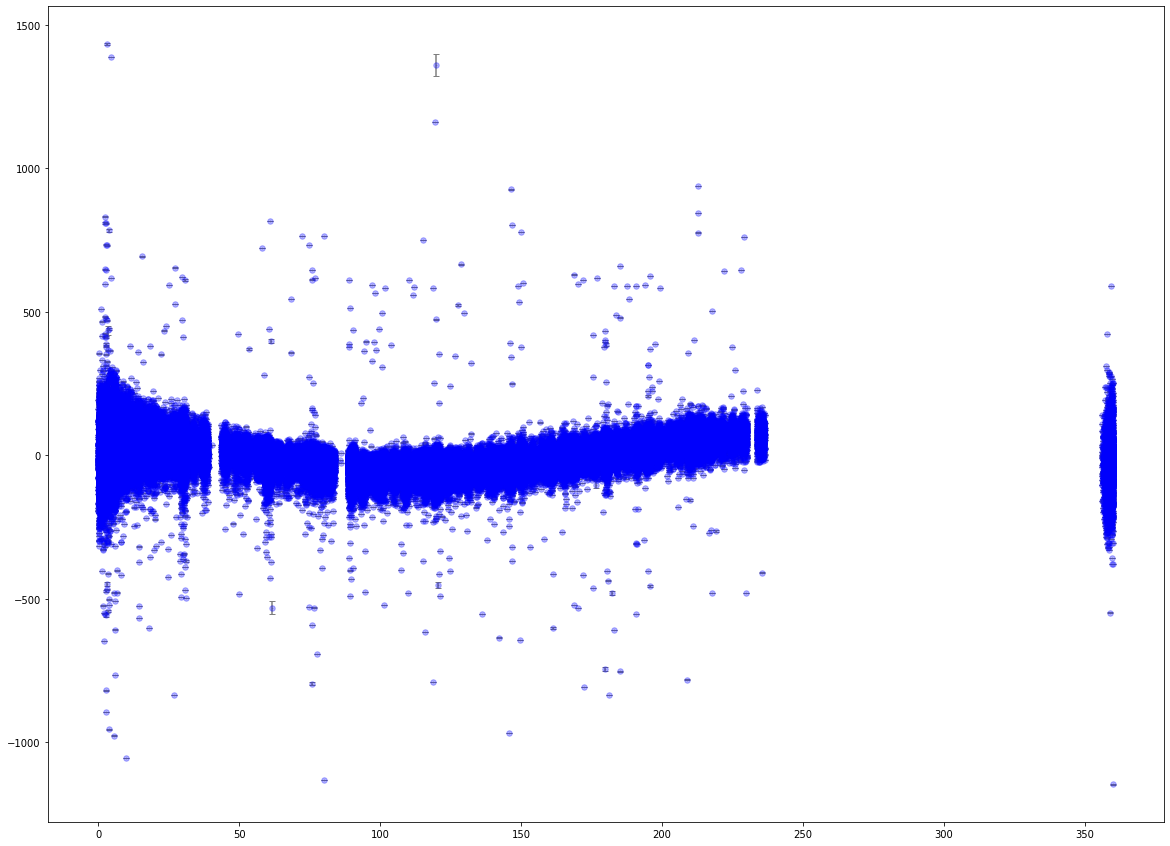

In [31]:
#efit
qe = (star['GLAT'] > -10) &\
    (star['GLAT'] < 10) &\
    (star['GLON'] < 9999) &\
    (star['GLON']>-9990) &\
    (star['VHELIO_AVG']< 9999)&\
    (star['VHELIO_AVG']>-9990)&\
    (star['VERR']< 9999)&\
    (star['VERR']>-9990) 
partemask = np.where(qe)[0]

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['GLON'][partemask],star['VHELIO_AVG'][partemask],s=30,c='b',alpha=0.3)
ax.errorbar(star['GLON'][partemask],star['VHELIO_AVG'][partemask], yerr=star['VERR'][partemask], c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)